Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

masukan data ke variable df

In [ ]:
df = pd.read_csv("diabetes-dataset.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


hapus kolom skinThickness karena data tidak valid, tidak semua rentang umur mempunya data skin thickness

In [ ]:
df = df.drop(columns='SkinThickness')

mencari jumlah glucose, BloodPressure, BMI, DiabtesPedigreeFunction, dan Age yang bernilai 0

In [ ]:
glucose = (df.Glucose == 0).sum()
BP = (df.BloodPressure == 0).sum()
bmi = (df.BMI == 0).sum()
DPF = (df.DiabetesPedigreeFunction == 0).sum()
age = (df.Age == 0).sum()

print("Nilai 0 di kolom glucose ada: ", glucose)
print("Nilai 0 di kolom BloodPressure ada: ", BP)
print("Nilai 0 di kolom BMI ada: ", bmi)
print("Nilai 0 di kolom DiabetesPedigreeFunction ada: ", DPF)
print("Nilai 0 di kolom Age ada: ", age)

Nilai 0 di kolom glucose ada:  13
Nilai 0 di kolom BloodPressure ada:  90
Nilai 0 di kolom BMI ada:  28
Nilai 0 di kolom DiabetesPedigreeFunction ada:  0
Nilai 0 di kolom Age ada:  0


hapus data glucose, bloodPresuure, dan BMI yang bernilai 0, karena data tidak valid

In [ ]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
df = df.loc[(df[['Glucose','BloodPressure','BMI']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
df.shape

(1888, 8)

Menggunakan boxplot untuk melihat outliers

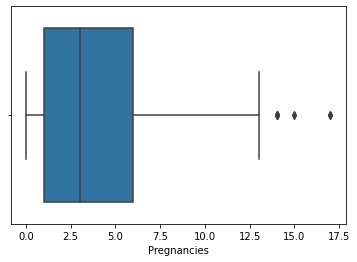

In [ ]:
sns.boxplot(x=df['Pregnancies'])

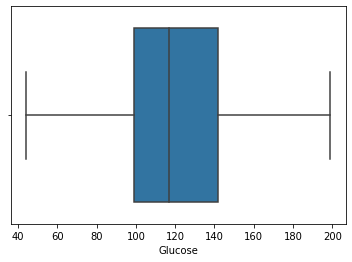

In [ ]:
sns.boxplot(x=df['Glucose'])

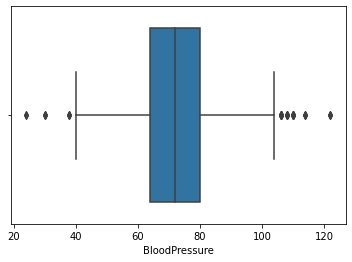

In [ ]:
sns.boxplot(x=df['BloodPressure'])

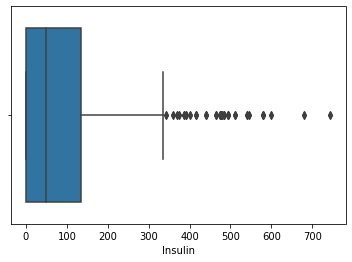

In [ ]:
sns.boxplot(x=df['Insulin'])

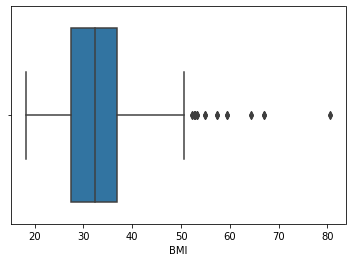

In [ ]:
sns.boxplot(x=df['BMI'])

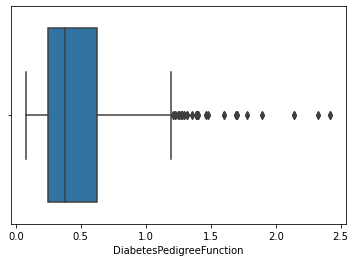

In [ ]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

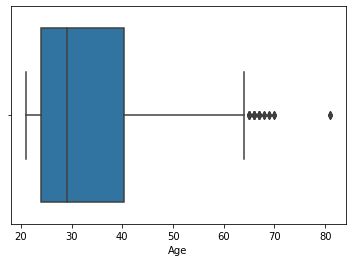

In [ ]:
sns.boxplot(x=df['Age'])

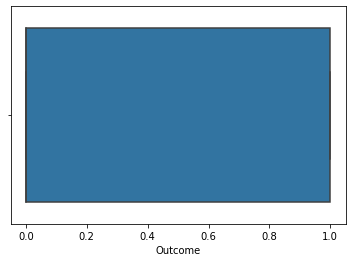

In [ ]:
sns.boxplot(x=df['Outcome'])

menghapus data outliers/pencilan

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df.shape

(1663, 8)

Histogram untuk melihat sebaran data

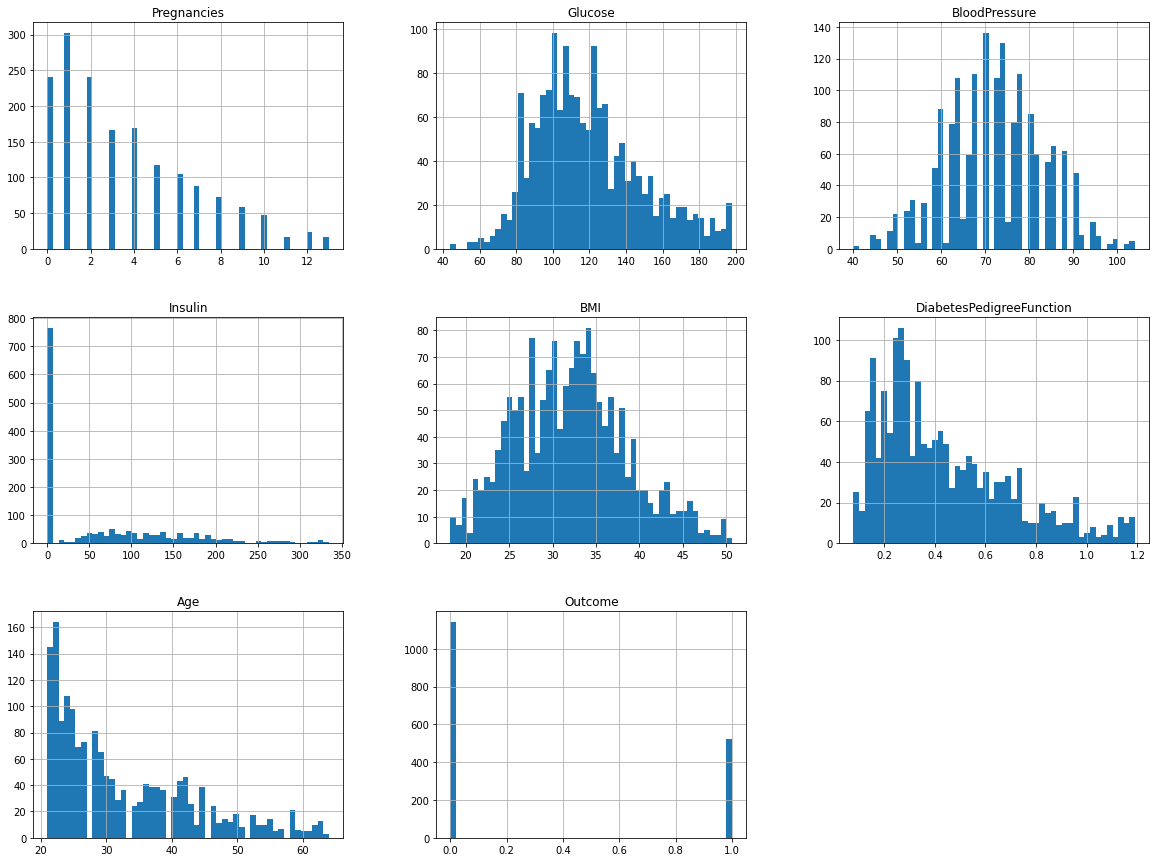

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

mennggunakan pairplot untuk melihat korelasi antar fitur

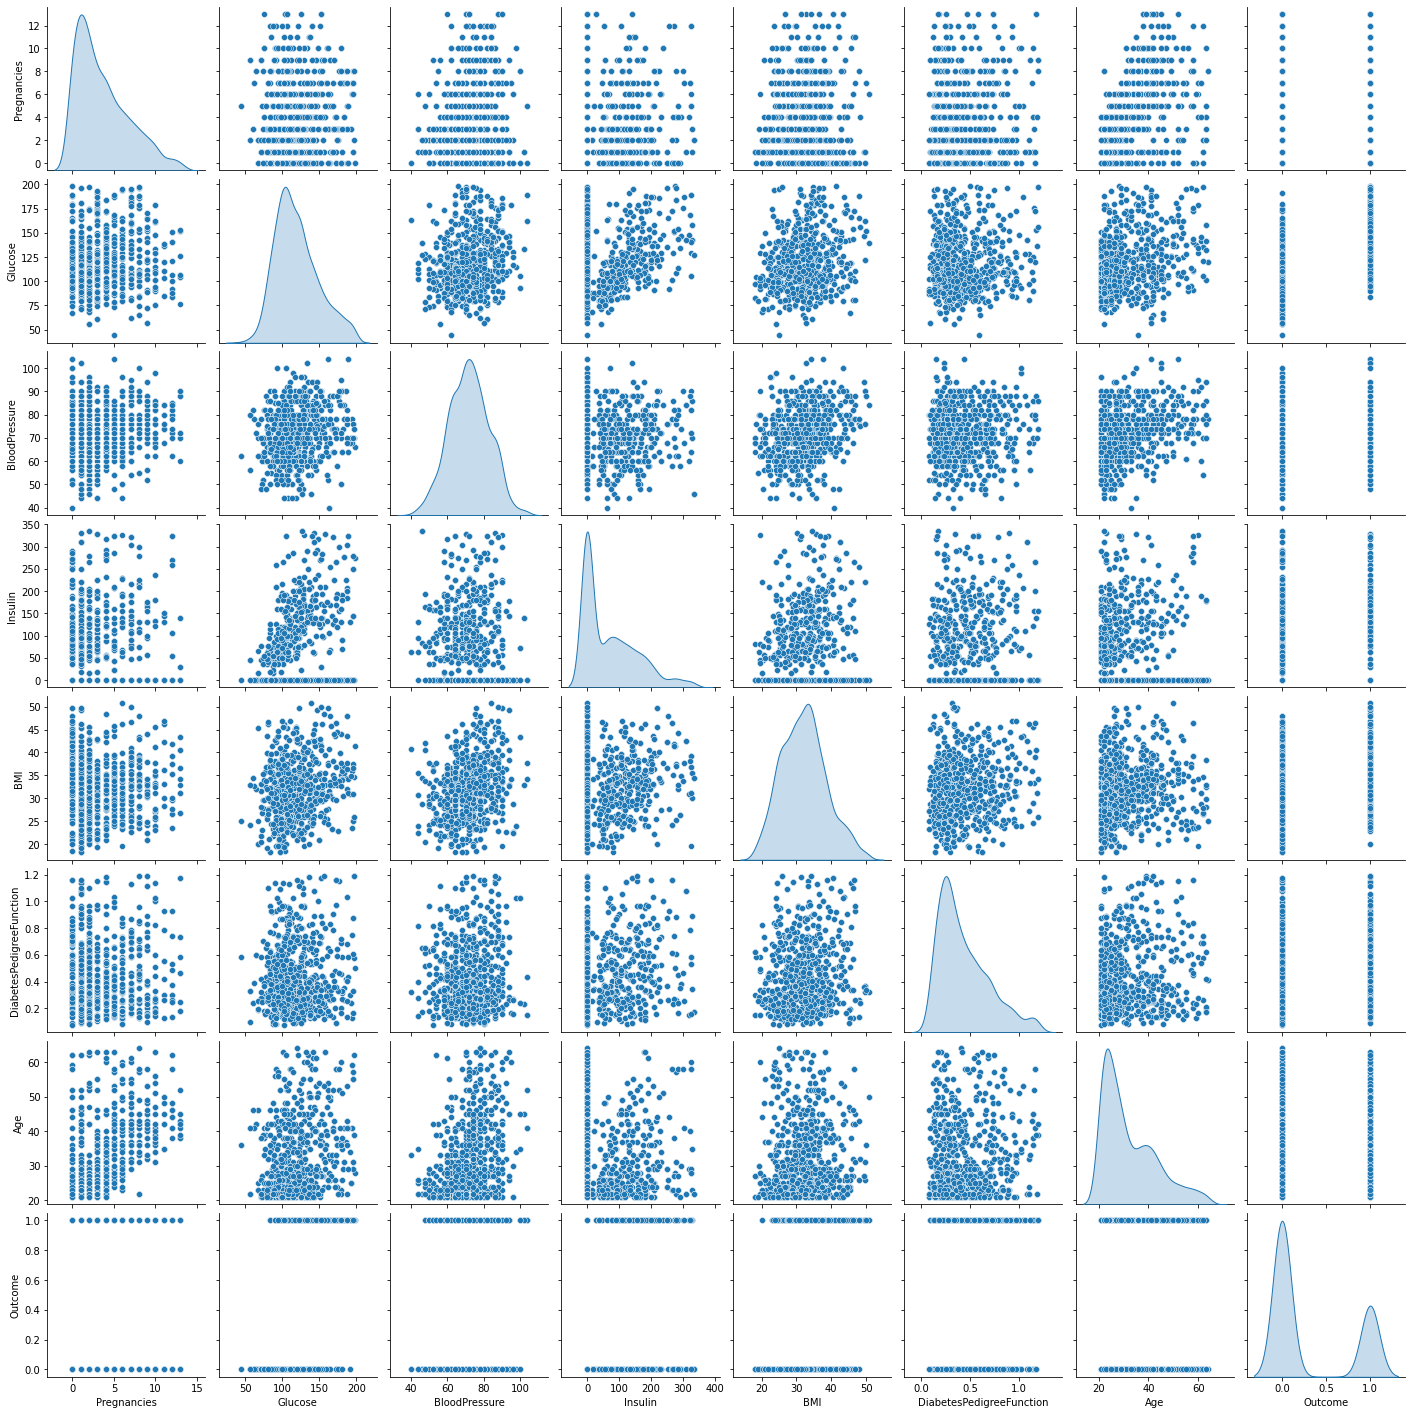

In [ ]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

melihat visualisai nilai korelasi antar fitur

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

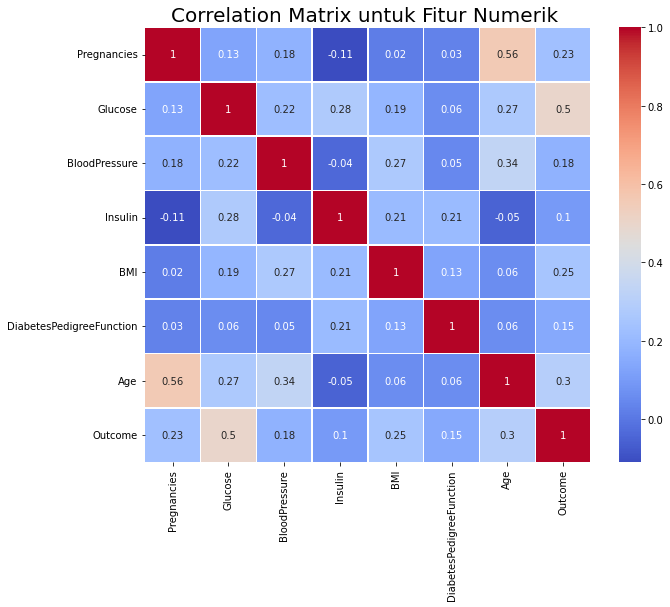

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

membagi dataset menjadi 90% data training dan 10% data test

In [ ]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["Outcome"],axis =1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Jumlah seluruh data, data training, dan data test

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1663
Total # of sample in train dataset: 1496
Total # of sample in test dataset: 167


Melakukan standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
1181,-0.826712,-0.285151,1.999719,-0.839330,0.107621,-0.667204,1.198092
1325,0.108811,0.019844,-0.357140,-0.839330,-0.389919,1.064000,0.163522
1964,1.979857,-0.386815,-0.538437,-0.839330,0.045428,-0.639910,0.915937
642,0.732493,0.934826,0.730641,-0.839330,-0.405468,-1.006426,1.668351
1149,-0.514871,0.053732,-0.175843,0.288165,1.087153,1.754143,-0.871048


In [ ]:
## Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Model SVM

In [ ]:
from sklearn.svm import SVC
 
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.8383233532934131

Model KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
 
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean', n_jobs=-1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)
knn.score(X_test,y_test)

0.9836561728386721

Model Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_predict = clf_model.predict(X_train)

In [ ]:
clf_model.score(X_test,y_test)

0.7604790419161677